<a href="https://colab.research.google.com/github/Pukar33/CBEAS-Project/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from google.colab import drive
drive.mount('/content/drive')
import nibabel as nib
import cv2 as cv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Task 1:***
**Python doesn't have inbuilt colormap for FreeSurfer. Since, FreeSurfer produces, segmentation images with own color information that can be obtained from LookUp table you can obtain RGB values for different labels from LookUP table and create a Colormap which can be used for later tasks.**

*Hint: You can see the code example from senior works and access tools like pandas and numpy.*

In [38]:
lookup_table = '/content/drive/MyDrive/Colab Notebooks/FS_LUT.txt'

In [39]:
def load_lookup_table(file):
  df = pd.read_csv(file,delim_whitespace=True,
                   comment='#',
                   names = ['Label_ID','Label_Name','R','G','B','A'],
                   usecols = ['Label_ID','Label_Name','R','G','B']
                   )
  df[['R','G','B']] = df[['R','G','B']].apply(lambda x:x/255)
  return df

In [40]:
label_df = load_lookup_table(lookup_table)
label_df

<ipython-input-39-91cb9373f4d2>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file,delim_whitespace=True,


,Label_ID,Label_Name,R,G,B
0,0,Unknown,0.000000,0.000000,0.000000
1,1,Left-Cerebral-Exterior,0.274510,0.509804,0.705882
2,2,Left-Cerebral-White-Matter,0.960784,0.960784,0.960784
3,3,Left-Cerebral-Cortex,0.803922,0.243137,0.305882
4,4,Left-Lateral-Ventricle,0.470588,0.070588,0.525490
...,...,...,...,...,...
1470,14171,wm_rh_S_suborbital,0.082353,0.078431,0.235294
1471,14172,wm_rh_S_subparietal,0.396078,0.235294,0.235294
1472,14173,wm_rh_S_temporal_inf,0.082353,0.705882,0.705882
1473,14174,wm_rh_S_temporal_sup,0.874510,0.862745,0.235294


In [41]:
free_cmap = mcolors.ListedColormap(label_df[['R','G','B']].values,name='freesurfer_cmap')

# ***Task 2:***

**Now, check if colormap has been correctly loaded or not. For this load any one label file from OASIS dataset and use the colormap you created in Task1 for it's visualization. To check if it has been correctly loaded verify your results in FreeSurfer as well.**

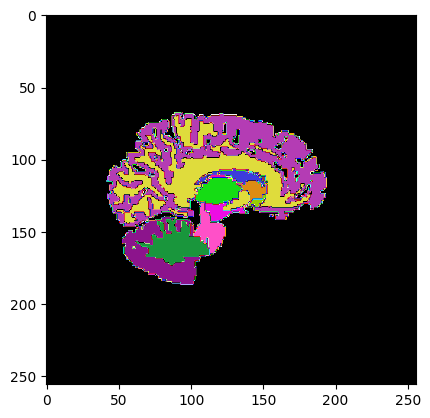

In [53]:
label_img = nib.load('/content/drive/MyDrive/Datasets/OASIS Dataset/Label Folder/OAS30001_MR_d0757.nii.gz').get_fdata()
plt.imshow(label_img[120,:,:],cmap = free_cmap)

# ***Task 3:***

**Now,create a pandas dataframe with information regarding Image File and it's corresponding label file for all image files and label files in the dataset:**

*   Image File Path
*   Image Size
*   Voxel Size
*   Image Orientation
*   Label File Path
*   Label Size
*   Label Voxel Size
*   Label File Orientation

***It would be meaninful to create a .csv file from this dataframe with filename Before_resampling.csv***


*Check for different inconsistencies among image and label files. How are they different in terms of size and orientation.*

*Please be careful for the images which are wrongly encoded for orienatations. You can check for these inconsistencies and scan all the images from dataset using ipywidgets.*



In [43]:
from nibabel.orientations import aff2axcodes
from glob import glob

In [44]:
img_directory = '/content/drive/MyDrive/Datasets/OASIS Dataset/Image Folder/*'
label_directory = '/content/drive/MyDrive/Datasets/OASIS Dataset/Label Folder/*'

image_files = sorted(glob(img_directory,recursive='True'))
label_files = sorted(glob(label_directory,recursive='True'))

In [45]:
def load_nifti(path):
  nifti_file = nib.load(path)
  return nifti_file

In [60]:
Image_label_info = []
for path1,path2 in zip(image_files,label_files):
  Image_info = {
      'Image Path':path1,
      'Image Voxel Size': load_nifti(path1).header.get_zooms(),
      'Image Size':load_nifti(path1).shape,
      'Image Orientation':aff2axcodes(load_nifti(path1).affine),
      'Label Path':path2,
      'Label Size':load_nifti(path2).shape,
      'Label Voxel Size':load_nifti(path2).header.get_zooms(),
      'Label Orientation':aff2axcodes(load_nifti(path2).affine)
  }
  Image_label_info.append(Image_info)

In [61]:
df = pd.DataFrame(Image_label_info)
df

,Image Path,Image Voxel Size,Image Size,Image Orientation,Label Path,Label Size,Label Voxel Size,Label Orientation
0,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(0.9999988, 1.0, 1.0)","(176, 256, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 0.99999994, 0.99999976)","(L, I, A)"
1,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(1.1999978, 1.0546874, 1.0546875)","(176, 240, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0000001, 1.0, 1.0000001)","(L, I, A)"
2,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(0.9999997, 1.0, 1.0)","(176, 256, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 0.99999994, 1.0000001)","(L, I, A)"
3,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(1.2000046, 1.0546875, 1.0546874)","(176, 240, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0)","(L, I, A)"
4,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(1.2000046, 1.0546875, 1.0546875)","(176, 240, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0)","(L, I, A)"
5,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(1.0000027, 0.99999994, 1.0)","(176, 256, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0000001)","(L, I, A)"
6,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(0.99999845, 1.0, 1.0)","(176, 256, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0000001, 1.0000001, 1.0000001)","(L, I, A)"
7,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(1.2000046, 1.0546875, 1.0546875)","(176, 240, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0)","(L, I, A)"
8,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(1.0000005, 1.0, 1.0)","(176, 256, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(0.9999998, 0.9999999, 1.0)","(L, I, A)"
9,/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(1.2000046, 1.0546875, 1.0546875)","(176, 240, 256)","(R, A, S)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0)","(L, I, A)"


In [48]:
df.to_csv('/content/drive/MyDrive/Preprocessing/OASIS Dataset/Before_resampling.csv',index = False)

In [49]:
from ipywidgets import interact

In [50]:
def load_image_label(sub_num,slice_num):
  img = load_nifti(image_files[sub_num]).get_fdata()
  label_in_RAS = nib.as_closest_canonical(load_nifti(label_files[sub_num]))
  label = label_in_RAS.get_fdata()

  fig,axes = plt.subplots(1,2)

  axes[0].imshow(img[:,:,slice_num],cmap = 'gray')
  axes[0].set_title('Image')

  axes[1].imshow(label[:,:,slice_num],cmap = free_cmap)
  axes[1].set_title('Label')

  return plt.show()

In [51]:
interact(load_image_label,sub_num = (0,len(image_files)-1,1),slice_num = (0,180,1))

interactive(children=(IntSlider(value=9, description='sub_num', max=19), IntSlider(value=90, description='slic…

<function __main__.load_image_label(sub_num, slice_num)>

# ***Task 4:***

**Now resample image file according to label file. Use resample_from_to method within nibabel.processing and hint from senior thesis.Do this resampling for all image files in dataset. Remember an image file needs to be resampled according to its own corresponding label file. You need to create a folder called Resampled_Image_Files apart from Image Files and Label Files folder that you have got already.**




In [54]:
from nibabel.processing import resample_from_to
import os

In [55]:
output_dir = '/content/drive/MyDrive/Preprocessing/OASIS Dataset/Resampled_Image_Files'
os.makedirs(output_dir,exist_ok=True)

In [56]:
for img_path, label_path in zip(image_files,label_files):
  img = load_nifti(img_path)
  label = load_nifti(label_path)

  resampled_img = resample_from_to(img,label,order=1) # Use order 1 for linear interpolation

  img_filename = os.path.basename(img_path)
  output_path = os.path.join(output_dir,img_filename)

  nib.save(resampled_img,output_path)

# ***Task 5:***

**Now, create again a pandas dataframe like in Task 3 with same features but for resampled image file and label file. Note down the differences you got after resampling. Save this result to new .csv file with name After_resampling.csv for analysis.Note down how resampling changes the features of an image file.**

In [57]:
resampled_img_directory = '/content/drive/MyDrive/Preprocessing/OASIS Dataset/Resampled_Image_Files/*'
resampled_image_files = sorted(glob(resampled_img_directory,recursive='True'))

In [62]:
Resampled_Image_label_info = []
for path1,path2 in zip(resampled_image_files,label_files):
  Resampled_Image_info = {
      'Resampled Image Path':path1,
      'Resampled Image Voxel Size': load_nifti(path1).header.get_zooms(),
      'Resampled Image Size':load_nifti(path1).shape,
      'Resampled Image Orientation':aff2axcodes(load_nifti(path1).affine),
      'Label Path':path2,
      'Label Size':load_nifti(path2).shape,
      'Label Voxel Size':load_nifti(path2).header.get_zooms(),
      'Label Orientation':aff2axcodes(load_nifti(path2).affine)
  }
  Resampled_Image_label_info.append(Resampled_Image_info)

In [63]:
df2 = pd.DataFrame(Resampled_Image_label_info)
df2

,Resampled Image Path,Resampled Image Voxel Size,Resampled Image Size,Resampled Image Orientation,Label Path,Label Size,Label Voxel Size,Label Orientation
0,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0, 0.99999994, 0.99999976)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 0.99999994, 0.99999976)","(L, I, A)"
1,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0000001, 1.0, 1.0000001)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0000001, 1.0, 1.0000001)","(L, I, A)"
2,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0, 0.99999994, 1.0000001)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 0.99999994, 1.0000001)","(L, I, A)"
3,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0, 1.0, 1.0)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0)","(L, I, A)"
4,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0, 1.0, 1.0)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0)","(L, I, A)"
5,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0, 1.0, 1.0000001)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0000001)","(L, I, A)"
6,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0000001, 1.0000001, 1.0000001)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0000001, 1.0000001, 1.0000001)","(L, I, A)"
7,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0, 1.0, 1.0)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0)","(L, I, A)"
8,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(0.9999998, 0.9999999, 1.0)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(0.9999998, 0.9999999, 1.0)","(L, I, A)"
9,/content/drive/MyDrive/Preprocessing/OASIS Dat...,"(1.0, 1.0, 1.0)","(256, 256, 256)","(L, I, A)",/content/drive/MyDrive/Datasets/OASIS Dataset/...,"(256, 256, 256)","(1.0, 1.0, 1.0)","(L, I, A)"


# ***Task 6:***

**Now, display any resampled image file along with its corresponding label file as an overlay. You can do this in matplotlib by controlling transparency factor .Hint Use ipywidgets, matplotlib**

In [64]:
import ipywidgets as widgets

In [66]:
resampled_image_file = nib.load(df2['Resampled Image Path'][0]).get_fdata()
label_file = nib.load(df2['Label Path'][0]).get_fdata()

In [68]:
#Define a function to update the plot based on the slidere value
def update_plot(transparency):
  fig,ax = plt.subplots()
  ax.imshow(resampled_image_file[:,:,100],cmap='gray')
  ax.imshow(label_file[:,:,100],cmap=free_cmap,alpha=transparency)
  ax.set_title('Resampled Image with Label Overlay')
  plt.show()

In [69]:
transparency_slider = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1,
    step=0.01,
    description='Transparency:',
    continuous_update=False
)

In [70]:
widgets.interact(update_plot,transparency=transparency_slider)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Transparency:', max=1.0, st…

<function __main__.update_plot(transparency)>